In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from google.colab import files
uploaded = files.upload()

Saving ward_profiles.csv to ward_profiles (1).csv


In [50]:

df = pd.read_csv('ward_profiles.csv', encoding='latin1')
print("Size of dataset is : ", df.shape)
df

Size of dataset is :  (661, 67)


,ï»¿ Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,Mean Age - 2013,Median Age - 2013,Area - Square Kilometres,Population density (persons per sq km) - 2013,% BAME - 2011,% Not Born in UK - 2011,% English is First Language of no one in household - 2011,General Fertility Rate - 2013,Male life expectancy -2009-13,Female life expectancy -2009-13,% children in reception year who are obese - 2011/12 to 2013/14,% children in year 6 who are obese- 2011/12 to 2013/14,"Rate of All Ambulance Incidents per 1,000 population - 2014",Rates of ambulance call outs for alcohol related illness - 2014,Number Killed or Seriously Injured on the roads - 2014,In employment (16-64) - 2011,Employment rate (16-64) - 2011,Number of jobs in area - 2013,Employment per head of resident WA population - 2013,Rate of new registrations of migrant workers - 2011/12,Median House Price (Â£) - 2014,Number of properties sold - 2014,Median Household income estimate (2012/13),Number of Household spaces - 2011,% detached houses - 2011,% semi-detached houses - 2011,% terraced houses - 2011,"% Flat, maisonette or apartment - 2011",% Households Owned - 2011,% Households Social Rented - 2011,% Households Private Rented - 2011,% dwellings in council tax bands A or B - 2015,"% dwellings in council tax bands C, D or E - 2015","% dwellings in council tax bands F, G or H - 2015",Claimant rate of key out-of-work benefits (working age client group) (2014),Claimant Rate of Housing Benefit (2015),Claimant Rate of Employment Support Allowance - 2014,Rate of JobSeekers Allowance (JSA) Claimants - 2015,% dependent children (0-18) in out-of-work households - 2014,% of households with no adults in employment with dependent children - 2011,% of lone parents not in employment - 2011,(ID2010) - Rank of average score (within London) - 2010,(ID2010) % of LSOAs in worst 50% nationally - 2010,Average GCSE capped point scores - 2014,Unauthorised Absence in All Schools (%) - 2013,% with no qualifications - 2011,% with Level 4 qualifications and above - 2011,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,City of London,00AA,E09000001,"8,100.00",650.00,"6,250.00","1,250.00",8.00,76.90,15.20,41.30,39.00,3.20,"2,538.00",21.40,36.70,11.90,38.40,84.30,88.60,11.10,23.20,140.00,19.34,57.00,"4,555.00",79.60,"392,400.00",63.30,138.90,"765,000.00",309.00,"63,620.00","5,530.00",0.40,0.20,1.40,98.00,42.30,16.50,35.90,4.60,61.90,33.40,5.10,5.30,1.90,1.30,9.50,0.90,24.20,551.00,20.00,355.00,0.70,6.70,68.40,662.90,210.50,656.40,85.30,0.40,18.60,0.40,7.90,5.30,48.50
1,Barking and Dagenham - Abbey,00ABFX,E05000026,"14,750.00","3,850.00","10,150.00",750.00,26.00,69.00,5.00,29.50,29.00,1.30,"10,500.00",71.90,57.30,25.70,97.60,80.20,83.90,13.30,24.70,157.30,1.30,2.00,"5,444.00",60.30,"9,500.00",1.00,108.70,"173,000.00",151.00,"33,920.00","4,753.00",3.90,7.20,22.60,66.30,32.70,26.70,38.60,45.20,54.80,-,15.10,16.10,4.20,4.00,22.10,8.70,55.30,166.00,86.00,318.00,1.40,16.40,34.50,682.60,208.90,138.10,42.20,1.40,21.90,0.50,6.00,0.80,25.70
2,Barking and Dagenham - Alibon,00ABFY,E05000027,"10,600.00","2,700.00","6,800.00","1,050.00",25.70,64.30,10.00,33.80,33.00,1.40,"7,429.00",29.90,24.70,7.90,83.30,77.20,80.60,10.00,26.00,139.80,0.90,1.00,"4,143.00",63.10,"1,000.00",0.10,31.10,"215,000.00",119.00,"32,470.00","4,045.00",3.80,18.20,63.80,14.20,45.10,36.80,15.90,9.70,90.30,-,20.70,17.70,7.30,3.70,24.70,12.40,61.00,124.00,100.00,307.00,1.50,31.20,16.70,627.90,201.60,73.60,27.30,0.70,20.60,0.80,3.10,1.00,20.30

In [51]:
x=625 # here we use a wider dataset, tweaking on the codes team member Laudomia presented.
y=662 
df.loc[x:y]
df.loc[x:y].index
df.drop(df.loc[x:y].index, inplace=True)
df

,ï»¿ Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,Mean Age - 2013,Median Age - 2013,Area - Square Kilometres,Population density (persons per sq km) - 2013,% BAME - 2011,% Not Born in UK - 2011,% English is First Language of no one in household - 2011,General Fertility Rate - 2013,Male life expectancy -2009-13,Female life expectancy -2009-13,% children in reception year who are obese - 2011/12 to 2013/14,% children in year 6 who are obese- 2011/12 to 2013/14,"Rate of All Ambulance Incidents per 1,000 population - 2014",Rates of ambulance call outs for alcohol related illness - 2014,Number Killed or Seriously Injured on the roads - 2014,In employment (16-64) - 2011,Employment rate (16-64) - 2011,Number of jobs in area - 2013,Employment per head of resident WA population - 2013,Rate of new registrations of migrant workers - 2011/12,Median House Price (Â£) - 2014,Number of properties sold - 2014,Median Household income estimate (2012/13),Number of Household spaces - 2011,% detached houses - 2011,% semi-detached houses - 2011,% terraced houses - 2011,"% Flat, maisonette or apartment - 2011",% Households Owned - 2011,% Households Social Rented - 2011,% Households Private Rented - 2011,% dwellings in council tax bands A or B - 2015,"% dwellings in council tax bands C, D or E - 2015","% dwellings in council tax bands F, G or H - 2015",Claimant rate of key out-of-work benefits (working age client group) (2014),Claimant Rate of Housing Benefit (2015),Claimant Rate of Employment Support Allowance - 2014,Rate of JobSeekers Allowance (JSA) Claimants - 2015,% dependent children (0-18) in out-of-work households - 2014,% of households with no adults in employment with dependent children - 2011,% of lone parents not in employment - 2011,(ID2010) - Rank of average score (within London) - 2010,(ID2010) % of LSOAs in worst 50% nationally - 2010,Average GCSE capped point scores - 2014,Unauthorised Absence in All Schools (%) - 2013,% with no qualifications - 2011,% with Level 4 qualifications and above - 2011,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,City of London,00AA,E09000001,"8,100.00",650.00,"6,250.00","1,250.00",8.00,76.90,15.20,41.30,39.00,3.20,"2,538.00",21.40,36.70,11.90,38.40,84.30,88.60,11.10,23.20,140.00,19.34,57.00,"4,555.00",79.60,"392,400.00",63.30,138.90,"765,000.00",309.00,"63,620.00","5,530.00",0.40,0.20,1.40,98.00,42.30,16.50,35.90,4.60,61.90,33.40,5.10,5.30,1.90,1.30,9.50,0.90,24.20,551.00,20.00,355.00,0.70,6.70,68.40,662.90,210.50,656.40,85.30,0.40,18.60,0.40,7.90,5.30,48.50
1,Barking and Dagenham - Abbey,00ABFX,E05000026,"14,750.00","3,850.00","10,150.00",750.00,26.00,69.00,5.00,29.50,29.00,1.30,"10,500.00",71.90,57.30,25.70,97.60,80.20,83.90,13.30,24.70,157.30,1.30,2.00,"5,444.00",60.30,"9,500.00",1.00,108.70,"173,000.00",151.00,"33,920.00","4,753.00",3.90,7.20,22.60,66.30,32.70,26.70,38.60,45.20,54.80,-,15.10,16.10,4.20,4.00,22.10,8.70,55.30,166.00,86.00,318.00,1.40,16.40,34.50,682.60,208.90,138.10,42.20,1.40,21.90,0.50,6.00,0.80,25.70
2,Barking and Dagenham - Alibon,00ABFY,E05000027,"10,600.00","2,700.00","6,800.00","1,050.00",25.70,64.30,10.00,33.80,33.00,1.40,"7,429.00",29.90,24.70,7.90,83.30,77.20,80.60,10.00,26.00,139.80,0.90,1.00,"4,143.00",63.10,"1,000.00",0.10,31.10,"215,000.00",119.00,"32,470.00","4,045.00",3.80,18.20,63.80,14.20,45.10,36.80,15.90,9.70,90.30,-,20.70,17.70,7.30,3.70,24.70,12.40,61.00,124.00,100.00,307.00,1.50,31.20,16.70,627.90,201.60,73.60,27.30,0.70,20.60,0.80,3.10,1.00,20.30

In [63]:
df= df.rename(columns={'ï»¿ Ward name ': 'Ward name'})
#there are usually some spaces in the column heads, which will cause error: "None of [Index(['ï»¿ Ward name', 'Population density (persons per sq km) - 2013',\n       '% All Working-age (16-64) - 2015', 'Employment rate (16-64) - 2011',\n       'Median Household income estimate (2012/13)', 'Crime rate - 2014/15'],\n      dtype='object')] are in the [columns]"
#So I print the columns out to see where the spaces are
df.columns

Index(['Ward name', ' Old code ', ' New code ', ' Population - 2015 ',
       ' Children aged 0-15 - 2015 ', ' Working-age (16-64) - 2015 ',
       ' Older people aged 65+ - 2015 ', ' % All Children aged 0-15 - 2015 ',
       ' % All Working-age (16-64) - 2015 ',
       ' % All Older people aged 65+ - 2015 ', ' Mean Age - 2013 ',
       ' Median Age - 2013 ', ' Area - Square Kilometres ',
       ' Population density (persons per sq km) - 2013 ', ' % BAME - 2011 ',
       ' % Not Born in UK - 2011 ',
       ' % English is First Language of no one in household - 2011 ',
       ' General Fertility Rate - 2013 ', ' Male life expectancy -2009-13 ',
       ' Female life expectancy -2009-13  ',
       ' % children in reception year who are obese - 2011/12 to 2013/14 ',
       ' % children in year 6 who are obese- 2011/12 to 2013/14 ',
       ' Rate of All Ambulance Incidents per 1,000 population - 2014 ',
       ' Rates of ambulance call outs for alcohol related illness - 2014 ',
       ' Num

In [64]:
df_all_wards=df[['Ward name', ' Population density (persons per sq km) - 2013 ', ' % All Working-age (16-64) - 2015 ', ' Employment rate (16-64) - 2011 ', ' Median Household income estimate (2012/13) ', ' Crime rate - 2014/15 ']]
df_all_wards= df_all_wards.rename(columns={'ï»¿Ward name ': 'Ward name'})
df_all_wards

,Ward name,Population density (persons per sq km) - 2013,% All Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Crime rate - 2014/15
0,City of London,"2,538.00",76.90,79.60,"63,620.00",656.40
1,Barking and Dagenham - Abbey,"10,500.00",69.00,60.30,"33,920.00",138.10
2,Barking and Dagenham - Alibon,"7,429.00",64.30,63.10,"32,470.00",73.60
3,Barking and Dagenham - Becontree,"9,269.00",65.90,61.20,"33,000.00",79.90
4,Barking and Dagenham - Chadwell Heath,"2,985.00",61.50,63.60,"33,920.00",76.10
...,...,...,...,...,...,...
620,Westminster - Tachbrook,"20,750.00",74.80,75.20,"47,340.00",57.70
621,Westminster - Vincent Square,"14,714.00",73.10,69.00,"46,550.00",82.40
622,Westminster - Warwick,"15,917.00",77.00,73.80,"50,250.00",138.10
623,Westminster - Westbourne,"18,500.00",70.20,59.00,"32,390.00",75.50


In [81]:
#Need to get rid of the commas, or later on will not be able to convert to float
df_all_wards[' Population density (persons per sq km) - 2013 '] = df_all_wards[' Population density (persons per sq km) - 2013 '].str.replace(',', '')
df_all_wards[' Median Household income estimate (2012/13) '] = df_all_wards[' Median Household income estimate (2012/13) '].str.replace(',', '')
df_all_wards[' Crime rate - 2014/15 '] = df_all_wards[' Crime rate - 2014/15 '].str.replace(',', '')
df_all_wards

,Ward name,Population density (persons per sq km) - 2013,% All Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Crime rate - 2014/15
0,City of London,2538.00,76.90,79.60,63620.00,656.40
1,Barking and Dagenham - Abbey,10500.00,69.00,60.30,33920.00,138.10
2,Barking and Dagenham - Alibon,7429.00,64.30,63.10,32470.00,73.60
3,Barking and Dagenham - Becontree,9269.00,65.90,61.20,33000.00,79.90
4,Barking and Dagenham - Chadwell Heath,2985.00,61.50,63.60,33920.00,76.10
...,...,...,...,...,...,...
620,Westminster - Tachbrook,20750.00,74.80,75.20,47340.00,57.70
621,Westminster - Vincent Square,14714.00,73.10,69.00,46550.00,82.40
622,Westminster - Warwick,15917.00,77.00,73.80,50250.00,138.10
623,Westminster - Westbourne,18500.00,70.20,59.00,32390.00,75.50


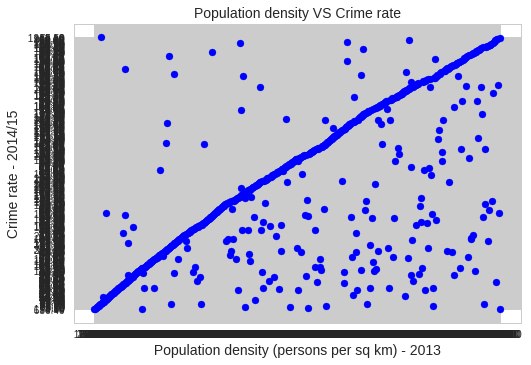

In [96]:
#We can do a quick linearity check
plt.scatter(df_all_wards[' Population density (persons per sq km) - 2013 '], df_all_wards[' Crime rate - 2014/15 '], color='blue')
plt.title('Population density VS Crime rate', fontsize=14)
plt.xlabel(' Population density (persons per sq km) - 2013 ', fontsize=14)
plt.ylabel(' Crime rate - 2014/15 ', fontsize=14)
plt.show()

In [82]:
import sklearn
from sklearn import linear_model
X = df_all_wards[[' Population density (persons per sq km) - 2013 ', ' % All Working-age (16-64) - 2015 ', ' Employment rate (16-64) - 2011 ', ' Median Household income estimate (2012/13) ']] 
# here we have 4 variables for multiple regression. 
# being population density, percentage of working age people, employment rate, and median household income
Y = df_all_wards[' rime rate - 2014/15 ']
# the years from which the data is captured are different, which will partially affect our accuracy.
 


In [83]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)




Intercept: 
 -258.7341777800802
Coefficients: 
 [-4.65108719e-03  8.06390598e+00 -3.65745577e+00  2.10602532e-03]


In [84]:
import statsmodels.api as sm

In [85]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y.astype(float),X.astype(float)).fit()
 
print_model = model.summary()
print(print_model)
#R square, coefficient, t value, P>t
#recording of last workshop, scatter graph of each variable

                              OLS Regression Results                              
Dep. Variable:      Crime rate - 2014/15    R-squared:                       0.256
Model:                                OLS   Adj. R-squared:                  0.251
Method:                     Least Squares   F-statistic:                     53.22
Date:                    Sat, 09 Jan 2021   Prob (F-statistic):           1.45e-38
Time:                            18:11:23   Log-Likelihood:                -3487.6
No. Observations:                     625   AIC:                             6985.
Df Residuals:                         620   BIC:                             7007.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [ ]:
df = pd.read_csv('ward_profiles.csv', encoding='latin1')
print("Size of dataset is : ", df.shape)